In [17]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms, datasets

In [14]:
transform = transforms.Compose([transforms.ToTensor()])

train = datasets.MNIST("", train = True, transform = transform, download = True)
test = datasets.MNIST("", train = True, transform = transform, download = True)

In [15]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

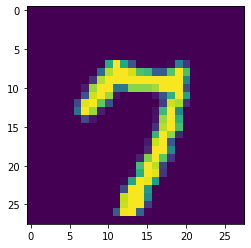

In [30]:
for batch in trainset:
    plt.imshow(batch[0][0].view(28, 28))
    break

In [34]:
import torch.nn as nn
import torch.nn.functional as F

In [64]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # we pass 28 * 28 flatten image
        # three layers of 64 neurons
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        self.layers = [self.fc1, self.fc2, self.fc3, self.fc4]
        
    def forward(self, x):
        for idx, layer in enumerate(self.layers):
            if idx == len(self.layers) - 1:
                x = layer(x)
            else:
                x = F.relu(layer(x))
            
        return F.log_softmax(x, dim = 1)
        
        
net = Net(); print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Let's validate that forward propagation works

In [65]:
x = torch.rand((28, 28)).view(1, 28 * 28)
r = net(x)
print(r)

tensor([[-2.2514, -2.2604, -2.3404, -2.4331, -2.3964, -2.3498, -2.3206, -2.1885,
         -2.2592, -2.2516]], grad_fn=<LogSoftmaxBackward>)


In [66]:
import torch.optim as optim

In [67]:
optimizer = optim.Adam(net.parameters(), lr = 0.01)

EPOCHS = 3

for epoch in range(EPOCHS):
    for batch in trainset:
        X, y = batch
        net.zero_grad()
        o = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(o, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.2035, grad_fn=<NllLossBackward>)
tensor(0.0332, grad_fn=<NllLossBackward>)
tensor(0.0499, grad_fn=<NllLossBackward>)


In [70]:
correct, total = 0, 0
with torch.no_grad():
    for batch in trainset:
        X, y = batch
        output = net(X.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print(f"accuracy: {round(correct / total, 3)}")

accuracy: 0.944


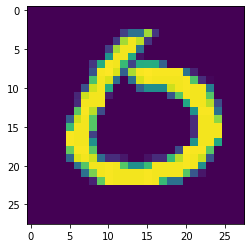

In [71]:
plt.imshow(X[0].view(28, 28))

In [72]:
print(torch.argmax(net(X[0].view(-1, 28 * 28))))

tensor(0)
